In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from PIL import Image
import torchvision.transforms as transforms
from sklearn.metrics import confusion_matrix
from torch.utils.data import Dataset, DataLoader
from skimage import io

In [ ]:
#!rm -rf DATASET

In [ ]:
!git clone https://github.com/omer1997/DATASET.git

Cloning into 'DATASET'...
remote: Enumerating objects: 37290, done.
remote: Total 37290 (delta 0), reused 0 (delta 0), pack-reused 37290
Receiving objects: 100% (37290/37290), 1.15 GiB | 13.91 MiB/s, done.
Resolving deltas: 100% (2200/2200), done.
Checking out files: 100% (51131/51131), done.


In [ ]:
fold_0_url="https://raw.githubusercontent.com/omer1997/DATASET/main/AdienceBenchmarkGenderAndAgeClassification/fold_0_data.txt"
fold_0_data=pd.read_csv(fold_0_url,sep = "\t")
fold_0_data

,user_id,original_image,face_id,age,gender,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
0,30601258@N03,10399646885_67c7d20df9_o.jpg,1,"(25, 32)",f,0,414,1086,1383,-115,30,17
1,30601258@N03,10424815813_e94629b1ec_o.jpg,2,"(25, 32)",m,301,105,640,641,0,0,94
2,30601258@N03,10437979845_5985be4b26_o.jpg,1,"(25, 32)",f,2395,876,771,771,175,-30,74
3,30601258@N03,10437979845_5985be4b26_o.jpg,3,"(25, 32)",m,752,1255,484,485,180,0,47
4,30601258@N03,11816644924_075c3d8d59_o.jpg,2,"(25, 32)",m,175,80,769,768,-75,0,34
...,...,...,...,...,...,...,...,...,...,...,...,...
4479,68094148@N04,11373794746_4720ac792a_o.jpg,478,"(25, 32)",m,664,0,242,211,-5,-15,73
4480,68094148@N04,11355711315_0f5b5da125_o.jpg,477,"(25, 32)",f,915,51,109,112,0,45,14
4481,10693681@N00,9162730346_b1bf71120a_o.jpg,479,"(25, 32)",m,2145,1270,249,249,10,30,25
4482,113830953@N04,11855529986_dff116e018_o.jpg,480,None,NaN,2878,1300,306,306,-100,0,164


In [ ]:
fold_1_url="https://raw.githubusercontent.com/omer1997/DATASET/main/AdienceBenchmarkGenderAndAgeClassification/fold_1_data.txt"
fold_1_data=pd.read_csv(fold_1_url,sep = "\t")
fold_1_data

,user_id,original_image,face_id,age,gender,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
0,114841417@N06,12068804204_085d553238_o.jpg,481,"(60, 100)",f,1141,780,975,976,0,0,118
1,114841417@N06,12068804204_085d553238_o.jpg,482,"(48, 53)",m,1821,283,969,969,-25,15,35
2,114841417@N06,12078357226_5fdd9367de_o.jpg,483,"(4, 6)",f,1788,341,306,306,-10,0,168
3,114841417@N06,12019067874_0e988248af_o.jpg,483,"(4, 6)",f,3,183,932,777,-115,0,27
4,114841417@N06,12077009614_2490487d2a_o.jpg,484,45,f,258,133,1734,1734,15,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...
3725,35953373@N04,9496952502_4e87cc8b60_o.jpg,907,"(15, 20)",m,1318,184,643,644,5,-30,78
3726,104937236@N08,11852401355_e54eba57b6_o.jpg,908,"(27, 32)",f,1310,725,573,573,-90,0,90
3727,37404707@N08,11128849885_6a56d25762_o.jpg,909,"(8, 12)",NaN,820,1099,364,364,-5,0,103
3728,37404707@N08,11182710183_e75c82dde1_o.jpg,910,"(60, 100)",NaN,1080,661,376,376,-5,0,61


In [ ]:
fold_2_url="https://raw.githubusercontent.com/omer1997/DATASET/main/AdienceBenchmarkGenderAndAgeClassification/fold_2_data.txt"
fold_2_data=pd.read_csv(fold_2_url,sep = "\t")
fold_2_data

,user_id,original_image,face_id,age,gender,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
0,64504106@N06,11831304783_488d6c3a6d_o.jpg,911,"(0, 2)",m,438,914,605,606,-90,0,123
1,64504106@N06,11849646776_35253e988f_o.jpg,911,"(0, 2)",m,19,712,1944,1736,-105,0,86
2,64504106@N06,11848166326_57b03f535e_o.jpg,911,"(0, 2)",m,382,680,1785,1768,-80,0,14
3,64504106@N06,11812546385_bb4d020dde_o.jpg,911,"(0, 2)",m,608,948,893,892,-105,0,8
4,64504106@N06,11831118625_81dcc72e75_o.jpg,912,"(38, 43)",m,23,150,508,508,-90,0,79
...,...,...,...,...,...,...,...,...,...,...,...,...
3889,19393853@N00,10701729133_9b74be645f_o.jpg,1317,None,NaN,2288,725,255,255,0,15,32
3890,19393853@N00,9767778096_b9ff679fb8_o.jpg,1317,None,NaN,508,337,1581,1581,-90,30,39
3891,19393853@N00,9709082628_9f1075d8ae_o.jpg,1317,None,NaN,326,93,954,867,-115,0,64
3892,19393853@N00,9767518631_71261193e8_o.jpg,1317,None,NaN,1246,353,994,995,-105,30,149


In [ ]:
fold_3_url="https://raw.githubusercontent.com/omer1997/DATASET/main/AdienceBenchmarkGenderAndAgeClassification/fold_3_data.txt"
fold_3_data=pd.read_csv(fold_3_url,sep = "\t")
fold_3_data

,user_id,original_image,face_id,age,gender,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
0,113445054@N07,11763777465_11d01c34ce_o.jpg,1322,"(25, 32)",m,1102,296,357,357,-15,0,59
1,113445054@N07,11763777465_11d01c34ce_o.jpg,1323,"(25, 32)",f,1713,580,325,325,-5,0,118
2,113445054@N07,11763777465_11d01c34ce_o.jpg,1324,"(15, 20)",f,1437,664,306,306,5,0,109
3,113445054@N07,11764005785_f21921aea6_o.jpg,1325,"(25, 32)",f,978,229,803,803,-20,-45,16
4,113445054@N07,11763728674_a41d99f71e_o.jpg,1326,"(25, 32)",m,1745,910,242,242,-10,0,55
...,...,...,...,...,...,...,...,...,...,...,...,...
3441,113728563@N05,11827967936_b29e8e87eb_o.jpg,1739,None,NaN,0,0,768,921,0,0,78
3442,113728563@N05,11826123976_c7d6738478_o.jpg,1742,None,NaN,450,906,932,932,0,0,127
3443,113728563@N05,11827955196_c97e4f877d_o.jpg,1743,None,NaN,72,142,560,560,20,0,13
3444,113728563@N05,11826168836_69124b9bdf_o.jpg,1741,None,NaN,0,1284,921,1160,-105,-30,74


In [ ]:
fold_4_url="https://raw.githubusercontent.com/omer1997/DATASET/main/AdienceBenchmarkGenderAndAgeClassification/fold_4_data.txt"
fold_4_data=pd.read_csv(fold_4_url,sep = "\t")
fold_4_data

,user_id,original_image,face_id,age,gender,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
0,115321157@N03,12111738395_a7f715aa4e_o.jpg,1744,"(4, 6)",m,663,997,637,638,-95,0,129
1,115321157@N03,12112413505_0aea8e17c6_o.jpg,1745,"(48, 53)",m,505,846,433,433,-95,0,72
2,115321157@N03,12112392255_995532c2f0_o.jpg,1744,"(4, 6)",m,517,1185,383,383,0,0,70
3,115321157@N03,12112392255_995532c2f0_o.jpg,1746,"(25, 32)",m,2247,688,376,376,0,30,67
4,115321157@N03,12112392255_995532c2f0_o.jpg,1747,"(25, 32)",m,1421,667,325,325,0,0,102
...,...,...,...,...,...,...,...,...,...,...,...,...
3811,7153718@N04,11598838386_349a0d4849_o.jpg,2282,None,NaN,596,460,1472,1473,-75,0,30
3812,7153718@N04,11598166203_c70bb34c80_o.jpg,2283,None,NaN,1179,755,331,331,5,0,108
3813,7153718@N04,11598166203_c70bb34c80_o.jpg,2282,None,NaN,1201,1179,293,293,5,0,99
3814,7153718@N04,11598145163_733cb99713_o.jpg,2282,None,NaN,1027,946,408,408,-85,0,49


In [ ]:
total_fold_data = pd.concat([fold_0_data, fold_1_data, fold_2_data, fold_3_data,fold_4_data], ignore_index=True)
print(' The shape of fold data 0 is : ' , fold_0_data.shape)
print(' The shape of fold data 1 is : ' , fold_1_data.shape)
print(' The shape of fold data 2 is : ' , fold_2_data.shape)
print(' The shape of fold data 3 is : ' , fold_3_data.shape)
print(' The shape of fold data 4 is : ' , fold_4_data.shape)
print(' The shape of TOTAL DATA  is : ' , total_fold_data.shape)

 The shape of fold data 0 is :  (4484, 12)
 The shape of fold data 1 is :  (3730, 12)
 The shape of fold data 2 is :  (3894, 12)
 The shape of fold data 3 is :  (3446, 12)
 The shape of fold data 4 is :  (3816, 12)
 The shape of TOTAL DATA  is :  (19370, 12)


In [ ]:
df = total_fold_data[['age', 'gender', 'x', 'y', 'dx', 'dy']].copy()

In [ ]:
img_path = []
for row in total_fold_data.iterrows():
    #print(row)
    path = "/content/DATASET/AdienceBenchmarkGenderAndAgeClassification/faces/"+row[1].user_id+"/coarse_tilt_aligned_face."+str(row[1].face_id)+"."+row[1].original_image
    #print(path)
    img_path.append(path)

df['img_path'] = img_path
display(df)
df['img_path'][1]

,age,gender,x,y,dx,dy,img_path
0,"(25, 32)",f,0,414,1086,1383,/content/DATASET/AdienceBenchmarkGenderAndAgeC...
1,"(25, 32)",m,301,105,640,641,/content/DATASET/AdienceBenchmarkGenderAndAgeC...
2,"(25, 32)",f,2395,876,771,771,/content/DATASET/AdienceBenchmarkGenderAndAgeC...
3,"(25, 32)",m,752,1255,484,485,/content/DATASET/AdienceBenchmarkGenderAndAgeC...
4,"(25, 32)",m,175,80,769,768,/content/DATASET/AdienceBenchmarkGenderAndAgeC...
...,...,...,...,...,...,...,...
19365,None,NaN,596,460,1472,1473,/content/DATASET/AdienceBenchmarkGenderAndAgeC...
19366,None,NaN,1179,755,331,331,/content/DATASET/AdienceBenchmarkGenderAndAgeC...
19367,None,NaN,1201,1179,293,293,/content/DATASET/AdienceBenchmarkGenderAndAgeC...
19368,None,NaN,1027,946,408,408,/content/DATASET/AdienceBenchmarkGenderAndAgeC...


'/content/DATASET/AdienceBenchmarkGenderAndAgeClassification/faces/30601258@N03/coarse_tilt_aligned_face.2.10424815813_e94629b1ec_o.jpg'

In [ ]:
age_mapping = [('(0, 2)', '0-2'), ('2', '0-2'), ('3', '0-2'), ('(4, 6)', '4-6'), ('(8, 12)', '8-13'), ('13', '8-13'), ('22', '15-20'), ('(8, 23)','15-20'), ('23', '25-32'), ('(15, 20)', '15-20'), ('(25, 32)', '25-32'), ('(27, 32)', '25-32'), ('32', '25-32'), ('34', '25-32'), ('29', '25-32'), ('(38, 42)', '38-43'), ('35', '38-43'), ('36', '38-43'), ('42', '48-53'), ('45', '38-43'), ('(38, 43)', '38-43'), ('(38, 42)', '38-43'), ('(38, 48)', '48-53'), ('46', '48-53'), ('(48, 53)', '48-53'), ('55', '48-53'), ('56', '48-53'), ('(60, 100)', '60+'), ('57', '60+'), ('58', '60+')]

age_mapping_dict = {each[0]: each[1] for each in age_mapping}
drop_labels = []
for idx, each in enumerate(df.age):
    if each == 'None':
        drop_labels.append(idx)
    else:
        df.age.loc[idx] = age_mapping_dict[each]

        
#drop none values in age        
df = df.drop(labels=drop_labels, axis=0) #droped None values
#df.age.value_counts(dropna=False)


#drop none gender values(u)  
df = df.dropna()
unbiased_data = df[df.gender != 'u'].copy()
#unbiased_data.info()

print(unbiased_data ['img_path'][1])
unbiased_data.head(2)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


/content/DATASET/AdienceBenchmarkGenderAndAgeClassification/faces/30601258@N03/coarse_tilt_aligned_face.2.10424815813_e94629b1ec_o.jpg


,age,gender,x,y,dx,dy,img_path
0,25-32,f,0,414,1086,1383,/content/DATASET/AdienceBenchmarkGenderAndAgeC...
1,25-32,m,301,105,640,641,/content/DATASET/AdienceBenchmarkGenderAndAgeC...


In [ ]:
#labeling gender
gender_to_label_map = {
    'f' : 0,
    'm' : 1
}

#labeling age
age_to_label_map = {
    '0-2'  :0,
    '4-6'  :1,
    '8-13' :2,
    '15-20':3,
    '25-32':4,
    '38-43':5,
    '48-53':6,
    '60+'  :7
}

label_to_age_map = {value: key for key, value in age_to_label_map.items()}
label_to_gender_map = {value: key for key, value in gender_to_label_map.items()}
#change age and gender to labels
unbiased_data['age'] = unbiased_data['age'].apply(lambda age: age_to_label_map[age])
unbiased_data['gender'] = unbiased_data['gender'].apply(lambda g: gender_to_label_map[g])
unbiased_data.reset_index(inplace=True)

print(unbiased_data['img_path'][1])
unbiased_data.head(2)


/content/DATASET/AdienceBenchmarkGenderAndAgeClassification/faces/30601258@N03/coarse_tilt_aligned_face.2.10424815813_e94629b1ec_o.jpg


,index,age,gender,x,y,dx,dy,img_path
0,0,4,0,0,414,1086,1383,/content/DATASET/AdienceBenchmarkGenderAndAgeC...
1,1,4,1,301,105,640,641,/content/DATASET/AdienceBenchmarkGenderAndAgeC...


In [ ]:
unbiased_data

,index,age,gender,x,y,dx,dy,img_path
0,0,4,0,0,414,1086,1383,/content/DATASET/AdienceBenchmarkGenderAndAgeC...
1,1,4,1,301,105,640,641,/content/DATASET/AdienceBenchmarkGenderAndAgeC...
2,2,4,0,2395,876,771,771,/content/DATASET/AdienceBenchmarkGenderAndAgeC...
3,3,4,1,752,1255,484,485,/content/DATASET/AdienceBenchmarkGenderAndAgeC...
4,4,4,1,175,80,769,768,/content/DATASET/AdienceBenchmarkGenderAndAgeC...
...,...,...,...,...,...,...,...,...
17447,19341,4,0,718,748,492,492,/content/DATASET/AdienceBenchmarkGenderAndAgeC...
17448,19342,4,1,48,472,768,768,/content/DATASET/AdienceBenchmarkGenderAndAgeC...
17449,19343,4,0,950,0,692,687,/content/DATASET/AdienceBenchmarkGenderAndAgeC...
17450,19344,4,0,831,895,899,899,/content/DATASET/AdienceBenchmarkGenderAndAgeC...


In [ ]:
unbiased_data['img_path'][1]

'/content/DATASET/AdienceBenchmarkGenderAndAgeClassification/faces/30601258@N03/coarse_tilt_aligned_face.2.10424815813_e94629b1ec_o.jpg'

1999
/content/DATASET/AdienceBenchmarkGenderAndAgeClassification/faces/10044155@N06/coarse_tilt_aligned_face.134.11343759245_695b4d73ff_o.jpg


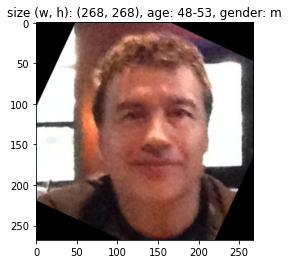

In [ ]:
#to plot image
def show_image(img_filename, age, gender):
    img = Image.open(img_filename)
    print(img_filename)
    plt.imshow(img)
    plt.title(f'size (w, h): {img.size}, age: {age}, gender: {gender}')
    plt.show()
    
idx = np.random.randint(unbiased_data.shape[0])
print(idx)
fname = unbiased_data['img_path'][idx]
age = label_to_age_map[unbiased_data['age'][idx]]
gender = label_to_gender_map[unbiased_data['gender'][idx]]
show_image(fname, age, gender)

In [ ]:

class FaceDataset(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, labels, data, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.labels = labels
        self.data = data
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        label = torch.tensor(int(self.labels.iloc[idx]))
        # label = self.labels.iloc[idx]
        img = self.data[idx]#io.imread(self.data[idx])
        # sample = {"data": img, "Class": label}
        # print(sample)
        # return sample
        # if torch.is_tensor(idx):
        #     idx = idx.tolist()

        # # img_name = os.path.join(self.root_dir,
        # #                         self.age_frame.iloc[idx, 0])
        # img_name = self.img_paths[idx]
        # image = io.imread(img_name)
        # landmarks = self.age_frame.iloc[idx, 1:]
        # landmarks = np.array([landmarks])
        # landmarks = landmarks.astype('float').reshape(-1, 2)
        # sample = {'image': image, 'landmarks': landmarks}

        if self.transform:
            transformed_img = self.transform(img)
        img = transformed_img
        return (img,label)

class Cifar_Conv_Net(nn.Module):
  '''initialize the model \n  loss_func(optional):defaults to F.cross_entropy,\n regularization = "L2" '''
  def __init__(self, loss_func = F.cross_entropy,activation_func = F.relu, regularization = "L2"):
    super(Cifar_Conv_Net,self).__init__()
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.pool = nn.MaxPool2d(2,2)
    # after calculating the size based on above convolutional layers the shape here will be [batches, chanels = 16, featres = [5,5]]
    self.fc1 = nn.Linear(16*5*5,120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)
    self.activation_func = activation_func;
    self.loss_func = loss_func
    self.regularization = regularization
  
  def forward(self,x):
    
    '''This function define the forward flow of the neural network.'''
    # initializing convolutional layer
    forward_flow = self.activation_func(self.conv1(x))
    forward_flow = self.pool(forward_flow)
    forward_flow = self.activation_func(self.conv2(forward_flow))
    forward_flow = self.pool(forward_flow)
    # the first parameter is the batch size, which pytorch automatically configures and the flatten size is calculated again based on the formula.
    forward_flow = forward_flow.view(-1, 16*5*5)
    # fully connected network is started here
    forward_flow = self.activation_func(self.fc1(forward_flow))
    forward_flow = self.activation_func(self.fc2(forward_flow))
    forward_flow = self.fc3(forward_flow)
    return forward_flow

  def fit(self, train_data, val_data,epochs = 100, opt_func = torch.optim.SGD, learning_rate = 0.001,weight_decay = 0.1,weight_decay_l1= 1,moment = 0,betas = None,classes=['m','f']):
    '''This function runs for given epochs and trains the model based on the parameters given 
    \n L2 regularization is done based on the weight decay parameter in the optimizer, 
    for ADAM pytorch documentation says that it uses weight decay to find L2 reg. seperately '''
    history = []
    #Add parameters based on type of optimizer.
    if(betas != None):
      optimizer = opt_func(self.parameters(), learning_rate, betas = betas, weight_decay = weight_decay)
    else:
      optimizer = opt_func(self.parameters(), learning_rate, momentum = moment, weight_decay = weight_decay)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_data:
          loss = self.training_step(batch)
          #L1 regularization, the lambda, hyper parameter is taken from weight_decay parameter.
          if(self.regularization.lower() == "l1"):
            l1_crit = nn.L1Loss(size_average=False)
            reg_loss = 0
            for param in model.parameters():
                reg_loss += l1_crit(param,target=torch.zeros_like(param))

            loss += weight_decay_l1 * reg_loss

          loss.backward()
          optimizer.step()
          optimizer.zero_grad()
        # Validation phase
        result = self.evaluate(val_data)
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
        history.append(result)
    self.show_confusion_matrix(train_data = training_data,val_data = val_data,classes=classes)
    return history

  def training_step(self,batch):
    ''' This function does a forward step and calculates the loss for each batch.'''
    imgs,labels = batch
    preds_with_curr_weights = self(imgs)
    loss = self.loss_func(preds_with_curr_weights,labels)
    return loss

  def evaluate(self, val_data):
    '''This function calculates the validation accuracy of whole data and returns it.'''
    outputs = [self.validation_step(batch) for batch in val_data]
    return self.validation_epoch_end(outputs)

  def validation_step(self, batch):
    '''this function calculates the validation accuracy of each batch'''
    images, labels = batch 
    out = self(images)                    
    loss = F.cross_entropy(out, labels)
    # self.add_class_details(out, labels,test_data = False)   
    acc = self.accuracy(out, labels)           
    return {'val_loss': loss.detach(), 'val_acc': acc}

  def validation_epoch_end(self, outputs):
    '''This function combines the losses and accuracy of all batches and send as one for all data'''
    batch_losses = [x['val_loss'] for x in outputs]
    epoch_loss = torch.stack(batch_losses).mean()   
    batch_accs = [x['val_acc'] for x in outputs]
    epoch_acc = torch.stack(batch_accs).mean()      
    return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

  def show_confusion_matrix(self,train_data= None,val_data =None,test_data =None,classes=['m','f']):
    ''' This function calculates the confusion matrix for given data '''
    if(train_data !=None):
      predicted = []
      actual = []
      for images,labels in train_data:
        _, preds = torch.max(self(images), dim=1)
        predicted.extend(preds.cpu())
        actual.extend(labels.cpu())
      print("The Training confusion matrix is..\n")
      conf_mat = confusion_matrix(actual,predicted)
      self.print_conf_mat(conf_mat,classes=classes)

    if(val_data !=None):
      predicted = []
      actual = []
      for images,labels in val_data:
        _, preds = torch.max(self(images), dim=1)
        predicted.extend(preds.cpu())
        actual.extend(labels.cpu())
      print("The validation confusion matrix is..\n")
      conf_mat = confusion_matrix(actual,predicted)
      self.print_conf_mat(conf_mat,classes=classes)
      print("\n")
    
    if(test_data !=None):
      predicted = []
      actual = []
      for images,labels in test_data:
        _, preds = torch.max(self(images), dim=1)
        predicted.extend(preds.cpu())
        actual.extend(labels.cpu())
      print("The test confusion matrix is..\n")
      conf_mat = confusion_matrix(actual,predicted)
      self.print_conf_mat(conf_mat,classes=classes)
      print("\n")

  def print_conf_mat(self,conf_mat,classes=['m','f']):
    ''' This function formats the confusion matrix and displays it. '''
    #classes = ['plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    print("       ",end = "  ")
    for each_class in classes:
      print(f'{each_class:7s}  ',end = " ")

    print("\n")
    for row in range(len(conf_mat)):
      print(f'{classes[row]:5s}', end = "   ")
      for column in range(len(conf_mat[0])):
        print(f'{ (conf_mat[row][column]/np.sum(conf_mat[row]))*100:5.2f} %', end = "   ")
      print("\n")
    print("\n")

  def accuracy(self,outputs, labels):
    '''calculates the accuracy of the model.'''
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))
#----------------------------------------------end of Neural Network class ---------------------------------

class DeviceDataLoader():
    '''This class wraps a dataloader to move data to a device'''
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

#-------------------------------------------end of DeviceDataLoader class ------------------------------------


def load_data(X_train,y_train,X_test,y_test,batch_size = 256,val_size = 2000, normalize = True, augument_data = True):
  '''This function will load the cifar-10 dataset from pytorch. '''
  # based on the parameter, the data is being normalized to check what might be the difference if we donot normalize it.
  torch.manual_seed(17)
  if(normalize):
    transform = transforms.Compose(
        [
         transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
    train_transform = transforms.Compose(
        [
         transforms.ToTensor(),
        #  transforms.RandomResizedCrop(224),
         transforms.RandomHorizontalFlip(p=0.5),
         transforms.RandomVerticalFlip(p=0.5),
        #  transforms.RandomGrayscale(p=0.3),
        #  transforms.RandomPerspective(p=0.5),
        #  transforms.RandomRotation((-360,360)),
        #  transforms.RandomInvert(p=0.3),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
  else:
    transform = transforms.Compose(
        [transforms.ToTensor()])
    train_transform = transforms.Compose(
        [
        transforms.ToTensor(),
        transforms.RandomHorizontalFlip(p=0.5),
         transforms.RandomVerticalFlip(p=0.5),
        #  transforms.RandomGrayscale(p=0.3),
        #  transforms.RandomPerspective(p=0.5),
        #  transforms.RandomRotation((-360,360)),
        #  transforms.RandomInvert(p=0.3),
         ])
  
  
 # train_set = torchvision.datasets.CIFAR10(root='./data', train=True,                                  
                                          #   download=True, transform=train_transform if augument_data else transform)
  train_set= FaceDataset(y_train,X_train,train_transform if augument_data else transform)
  torch.manual_seed(43)
  train_size = len(train_set) - val_size
  train_ds, val_ds = torch.utils.data.random_split(train_set, [train_size, val_size])
  
  train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size,
                                            shuffle=True, num_workers=2)
  
  val_loader = torch.utils.data.DataLoader(val_ds, batch_size=batch_size,
                                          shuffle=False, num_workers=2)
  
  test_set= FaceDataset(y_test,X_test,transform)
  test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size,
                                          shuffle=False, num_workers=2)
  print(type(test_set))
  print(type(train_set)) 
  classes_gender = (0,1)
  classes_age = (0,1,2,3,4,5,6,7)
  
  
  return train_loader,val_loader,test_loader,classes_gender,classes_age
  
# functions to show an image
def imshow(img,normalized):
  '''This function will plot all the images.
      training_data and classes are required inputs'''
  if(normalized):
    img = img / 2 + 0.5     # unnormalize
  np_img = img.numpy()
  plt.figure(figsize = (10,10))
  plt.axis('off')
  plt.imshow(np.transpose(np_img, (1, 2, 0)),aspect='equal')
  plt.show()

def plot_img_from_each_class(training_data,classes, normalized = True):
  '''This function will find one image from each class and collect them together for plotting.
      training_data and classes are required inputs'''
  img_tensor_from_each_class = None
  classes_covered = [-1]*10
  curr_ind = 0
  #get one image from each class
  for batch_imgs, labels in training_data:
    for img,label in zip(batch_imgs,labels):
      if(-1 not in classes_covered):
        break
      elif(classes_covered[int(label)] != -1):
        continue
      else:
        if img_tensor_from_each_class == None:
          img_tensor_from_each_class = torch.reshape(img,(1,3,32,32))
        else:
          # print(img_tensor_from_each_class.shape,img.shape)
          img_tensor_from_each_class = torch.cat([img_tensor_from_each_class,torch.reshape(img,(1,3,32,32))])
        classes_covered[int(label)] = (curr_ind,int(label))
        curr_ind +=1
  # show images
  imshow(torchvision.utils.make_grid(img_tensor_from_each_class,nrow = 5),normalized)
  # print labels
  classes_covered.sort(key = lambda x: x[0])
  print(' '.join('       {:6}'.format(classes[each_class[1]]) if (ind != 4) else (''.join('       {:6}'.format(classes[each_class[1]])))+"\n"  for ind,each_class in enumerate(classes_covered)))

def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('validation accuracy')
    plt.title('Accuracy vs. No. of epochs');

In [ ]:
#splitting dataset
X = unbiased_data[['img_path']]
y = unbiased_data[['gender']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('Train data shape {}'.format(X_train.shape))
print('Test data shape {}'.format(X_test.shape))

Train data shape (12216, 1)
Test data shape (5236, 1)


In [ ]:
train_images = []
test_images = []

for row in X_train.iterrows():
    image = Image.open(row[1].img_path)
    image = image.resize((227, 227))   # Resize the image
    data = np.asarray(image)
    train_images.append(data)

for row in X_test.iterrows():
    image = Image.open(row[1].img_path)
    image = image.resize((227, 227))  # Resize the image
    data = np.asarray(image)
    test_images.append(data)

train_images = np.asarray(train_images)
test_images = np.asarray(test_images)

print('Train images shape {}'.format(train_images.shape))
print('Test images shape {}'.format(test_images.shape))


Train images shape (12216, 227, 227, 3)
Test images shape (5236, 227, 227, 3)


In [ ]:
train_loader,val_loader,test_loader,classes_gender,classes_age = load_data(train_images,y_train,test_images,y_test,batch_size = 32,val_size = 2000, normalize = True, augument_data = True)

<class '__main__.FaceDataset'>
<class '__main__.FaceDataset'>


In [ ]:
device = get_default_device()
print("device being used is ", device)
training_data = DeviceDataLoader(train_loader,device)
val_data = DeviceDataLoader(val_loader,device)
test_data = DeviceDataLoader(test_loader,device)

device being used is  cuda


In [ ]:
class Cifar_Net(Cifar_Conv_Net):
  def __init__(self, loss_func = F.cross_entropy,regularization = "L2"):
    super(Cifar_Conv_Net,self).__init__()
    self.conv1 = nn.Conv2d(3, 3, 3, padding = 'same')  #=> 32-5 +1=  28 i/p size = (32,28,28)
    self.conv2 = nn.Conv2d(3, 128, 3,padding = 'same') #=> 28-5 +1=  24 i/p size = (64,24,24)
    self.conv1_bn=nn.BatchNorm2d(128)
    self.pool = nn.MaxPool2d(2,2)    #=> (16,12,12)
    self.conv3 = nn.Conv2d(128, 128, 5, padding = 'same') #=> 12-5 +1=  8 i/p size = (32,8,8)
    self.conv4 = nn.Conv2d(128, 256, 5, padding = 'same') #=> 8-5 +1=  4 i/p size = (64,4,4)
    self.conv2_bn=nn.BatchNorm2d(256)
    self.conv5 = nn.Conv2d(256, 256, 5, padding = 'same') #=> 12-5 +1=  8 i/p size = (32,8,8)
    self.conv6 = nn.Conv2d(256, 512, 5, padding = 'same') #=> 8-5 +1=  4 i/p size = (64,4,4)
    self.conv3_bn=nn.BatchNorm2d(512)
    # after calculating the size based on above convolutional layers the shape here will be [batches, chanels = 16, featres = [5,5]]
    # ((W – K + 2P) / S) + 1
    self.fc1 = nn.Linear(512*28*28,120) 
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,2)
    self.activation_func = F.relu;
    self.loss_func = loss_func
    self.regularization = regularization
    self.dropout = nn.Dropout(p=0.2)
  
  def forward(self,x):
    
    '''This function define the forward flow of the neural network.'''
    # initializing convolutional layer
    forward_flow = self.activation_func((self.conv2(x)))
    #forward_flow = self.activation_func(self.conv1_bn(self.conv2(forward_flow)))
    forward_flow = self.pool(forward_flow)
    forward_flow = self.dropout(forward_flow)
    forward_flow = self.activation_func((self.conv4(forward_flow)))
    #forward_flow = self.activation_func(self.conv2_bn(self.conv4(forward_flow)))
    forward_flow = self.pool(forward_flow)
    forward_flow = self.dropout(forward_flow)
    forward_flow = self.activation_func((self.conv6(forward_flow)))
    #forward_flow = self.activation_func(self.conv3_bn(self.conv6(forward_flow)))
    forward_flow = self.pool(forward_flow)
    forward_flow = self.dropout(forward_flow)
    # the first parameter is the batch size, which pytorch automatically configures and the flatten size is calculated again based on the formula.
    forward_flow = forward_flow.view(-1, 512*28*28)
    # fully connected network is started here
    forward_flow = self.activation_func(self.fc1(forward_flow))
    forward_flow = self.dropout(forward_flow)
    forward_flow = self.activation_func(self.fc2(forward_flow))
    forward_flow = self.dropout(forward_flow)
    forward_flow = self.fc3(forward_flow)
    return forward_flow

In [23]:
model = None
model = to_device(Cifar_Net(), device)
history = [model.evaluate(val_data)]
history += model.fit(training_data, val_data, epochs = 35, learning_rate = 0.01,weight_decay = 0,moment = 0.9)

Epoch [0], val_loss: 0.6235, val_acc: 0.6453
Epoch [1], val_loss: 0.5941, val_acc: 0.6741
Epoch [2], val_loss: 0.5445, val_acc: 0.7049
Epoch [3], val_loss: 0.5301, val_acc: 0.7331
Epoch [4], val_loss: 0.5145, val_acc: 0.7326
Epoch [5], val_loss: 0.4481, val_acc: 0.7812
Epoch [6], val_loss: 0.4483, val_acc: 0.7703
Epoch [7], val_loss: 0.4487, val_acc: 0.7669
Epoch [8], val_loss: 0.4010, val_acc: 0.8110
Epoch [9], val_loss: 0.3707, val_acc: 0.8284
Epoch [10], val_loss: 0.3595, val_acc: 0.8388
Epoch [11], val_loss: 0.3474, val_acc: 0.8586
Epoch [12], val_loss: 0.3175, val_acc: 0.8641
Epoch [13], val_loss: 0.3023, val_acc: 0.8710
Epoch [14], val_loss: 0.3010, val_acc: 0.8681
Epoch [15], val_loss: 0.2424, val_acc: 0.9018
Epoch [16], val_loss: 0.3263, val_acc: 0.8591
Epoch [17], val_loss: 0.2504, val_acc: 0.8943
Epoch [18], val_loss: 0.2499, val_acc: 0.8929
Epoch [19], val_loss: 0.2349, val_acc: 0.9092
Epoch [20], val_loss: 0.2276, val_acc: 0.9082
Epoch [21], val_loss: 0.2144, val_acc: 0.919

In [24]:
print("The accuracy of test data is\n",f'{model.evaluate(test_data)["val_acc"]*100:3.2f}',"%\n")
model.show_confusion_matrix(test_data = test_data)

The accuracy of test data is
 87.27 %

The test confusion matrix is..

         m         f         

m       87.06 %   12.94 %   

f       10.23 %   89.77 %   







In [25]:
#     AGE MODEL

In [26]:
#splitting dataset
X = unbiased_data[['img_path']]
y = unbiased_data[['age']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('Train data shape {}'.format(X_train.shape))
print('Test data shape {}'.format(X_test.shape))

Train data shape (12216, 1)
Test data shape (5236, 1)


In [27]:
train_images = []
test_images = []

for row in X_train.iterrows():
    image = Image.open(row[1].img_path)
    image = image.resize((227, 227))   # Resize the image
    data = np.asarray(image)
    train_images.append(data)

for row in X_test.iterrows():
    image = Image.open(row[1].img_path)
    image = image.resize((227, 227))  # Resize the image
    data = np.asarray(image)
    test_images.append(data)

train_images = np.asarray(train_images)
test_images = np.asarray(test_images)

print('Train images shape {}'.format(train_images.shape))
print('Test images shape {}'.format(test_images.shape))

Train images shape (12216, 227, 227, 3)
Test images shape (5236, 227, 227, 3)


In [28]:
train_loader,val_loader,test_loader,classes_gender,classes_age = load_data(train_images,y_train,test_images,y_test,batch_size = 32,val_size = 2000, normalize = True, augument_data = True)

<class '__main__.FaceDataset'>
<class '__main__.FaceDataset'>


In [29]:
X_train.shape

(12216, 1)

In [30]:
class Cifar_Net(Cifar_Conv_Net):
  def __init__(self, loss_func = F.cross_entropy,regularization = "L2"):
    super(Cifar_Conv_Net,self).__init__()
    self.conv1 = nn.Conv2d(3, 3, 3, padding = 'same')  #=> 32-5 +1=  28 i/p size = (32,28,28)
    self.conv2 = nn.Conv2d(3, 128, 3,padding = 'same') #=> 28-5 +1=  24 i/p size = (64,24,24)
    self.conv1_bn=nn.BatchNorm2d(128)
    self.pool = nn.MaxPool2d(2,2)    #=> (16,12,12)
    self.conv3 = nn.Conv2d(128, 128, 5, padding = 'same') #=> 12-5 +1=  8 i/p size = (32,8,8)
    self.conv4 = nn.Conv2d(128, 256, 5, padding = 'same') #=> 8-5 +1=  4 i/p size = (64,4,4)
    self.conv2_bn=nn.BatchNorm2d(256)
    self.conv5 = nn.Conv2d(256, 256, 5, padding = 'same') #=> 12-5 +1=  8 i/p size = (32,8,8)
    self.conv6 = nn.Conv2d(256, 512, 5, padding = 'same') #=> 8-5 +1=  4 i/p size = (64,4,4)
    self.conv3_bn=nn.BatchNorm2d(512)
    # after calculating the size based on above convolutional layers the shape here will be [batches, chanels = 16, featres = [5,5]]
    # ((W – K + 2P) / S) + 1
    self.fc1 = nn.Linear(512*28*28,120) 
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,8)
    self.activation_func = F.relu;
    self.loss_func = loss_func
    self.regularization = regularization
    self.dropout = nn.Dropout(p=0.2)
  
  def forward(self,x):
    '''This function define the forward flow of the neural network.'''
    # initializing convolutional layer
    forward_flow = self.activation_func((self.conv2(x)))
    #forward_flow = self.activation_func(self.conv1_bn(self.conv2(forward_flow)))
    forward_flow = self.pool(forward_flow)
    forward_flow = self.dropout(forward_flow)
    forward_flow = self.activation_func((self.conv4(forward_flow)))
    #forward_flow = self.activation_func(self.conv2_bn(self.conv4(forward_flow)))
    forward_flow = self.pool(forward_flow)
    forward_flow = self.dropout(forward_flow)
    forward_flow = self.activation_func((self.conv6(forward_flow)))
    #forward_flow = self.activation_func(self.conv3_bn(self.conv6(forward_flow)))
    forward_flow = self.pool(forward_flow)
    forward_flow = self.dropout(forward_flow)
    # the first parameter is the batch size, which pytorch automatically configures and the flatten size is calculated again based on the formula.
    forward_flow = forward_flow.view(-1, 512*28*28)
    # fully connected network is started here
    forward_flow = self.activation_func(self.fc1(forward_flow))
    forward_flow = self.dropout(forward_flow)
    forward_flow = self.activation_func(self.fc2(forward_flow))
    forward_flow = self.dropout(forward_flow)
    forward_flow = self.fc3(forward_flow)
    return forward_flow

In [31]:
device = get_default_device()
print("device being used is ", device)
training_data = DeviceDataLoader(train_loader,device)
val_data = DeviceDataLoader(val_loader,device)
test_data = DeviceDataLoader(test_loader,device)

device being used is  cuda


In [32]:
model = None
model = to_device(Cifar_Net(), device)
history = [model.evaluate(val_data)]
history += model.fit(training_data, val_data, epochs = 30, learning_rate = 0.01,weight_decay = 0,moment = 0.9,classes=['0-2','4-6','8-13','15-20','25-32','38-43','48-53','60+'])

Epoch [0], val_loss: 1.8646, val_acc: 0.2956
Epoch [1], val_loss: 1.7558, val_acc: 0.3328
Epoch [2], val_loss: 1.6459, val_acc: 0.3581
Epoch [3], val_loss: 1.5709, val_acc: 0.3770
Epoch [4], val_loss: 1.5223, val_acc: 0.4013
Epoch [5], val_loss: 1.4383, val_acc: 0.4231
Epoch [6], val_loss: 1.4035, val_acc: 0.4489
Epoch [7], val_loss: 1.3020, val_acc: 0.4807
Epoch [8], val_loss: 1.2606, val_acc: 0.5094
Epoch [9], val_loss: 1.1824, val_acc: 0.5268
Epoch [10], val_loss: 1.1083, val_acc: 0.5461
Epoch [11], val_loss: 1.1187, val_acc: 0.5491
Epoch [12], val_loss: 1.0879, val_acc: 0.5689
Epoch [13], val_loss: 1.0412, val_acc: 0.5992
Epoch [14], val_loss: 0.9930, val_acc: 0.6007
Epoch [15], val_loss: 1.0337, val_acc: 0.6002
Epoch [16], val_loss: 0.8751, val_acc: 0.6558
Epoch [17], val_loss: 0.8468, val_acc: 0.6890
Epoch [18], val_loss: 0.7737, val_acc: 0.7034
Epoch [19], val_loss: 0.7683, val_acc: 0.7073
Epoch [20], val_loss: 0.7511, val_acc: 0.7178
Epoch [21], val_loss: 0.6844, val_acc: 0.751

In [33]:
print("The accuracy of test data is\n",f'{model.evaluate(test_data)["val_acc"]*100:3.2f}',"%\n")
model.show_confusion_matrix(test_data = test_data,classes =['0-2','4-6','8-13','15-20','25-32','38-43','48-53','60+'] )

The accuracy of test data is
 54.95 %

The test confusion matrix is..

         0-2       4-6       8-13      15-20     25-32     38-43     48-53     60+       

0-2     79.62 %   14.22 %    1.66 %    0.47 %    3.79 %    0.24 %    0.00 %    0.00 %   

4-6     27.20 %   54.40 %   10.24 %    2.88 %    3.36 %    1.76 %    0.00 %    0.16 %   

8-13     2.27 %   13.75 %   54.23 %    8.46 %   15.71 %    4.38 %    0.91 %    0.30 %   

15-20    1.25 %    3.23 %    8.78 %   37.99 %   33.51 %   12.19 %    3.05 %    0.00 %   

25-32    0.51 %    1.03 %    5.26 %    8.02 %   65.60 %   15.34 %    3.34 %    0.90 %   

38-43    0.57 %    0.57 %    5.01 %    6.48 %   31.74 %   47.33 %    5.92 %    2.39 %   

48-53    1.12 %    0.75 %    6.37 %    6.37 %   22.10 %   26.97 %   28.46 %    7.87 %   

60+      1.51 %    1.13 %    2.26 %    4.15 %   14.72 %   20.00 %   18.49 %   37.74 %   





